In [22]:
#任务：基于zgpa_train.csv数据，建立RNN模型，预测股价：

#1.完成数据预处理，将序列数据转化为可用于RNN输入的数据
#2.对新数据zgpa_test.csv进行预测，可视化结果
#3.存储预测结果，并观察局部预测结果
#备注：模型结构：单层RNN，输出有5个神经元；每次使用前8个数据预测第9个数据

In [42]:
#check data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [43]:
price = data['close']
print(price.shape)

(731,)


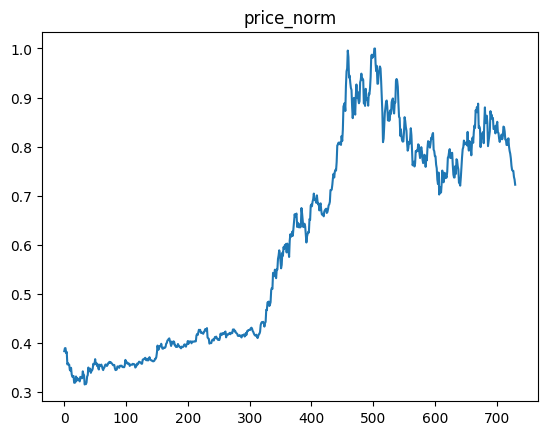

(731,)


In [46]:
#归一化收盘价
price_norm = price/max(price)
plt.plot(price_norm)
plt.title('price_norm')
plt.show()
print(price_norm.shape)


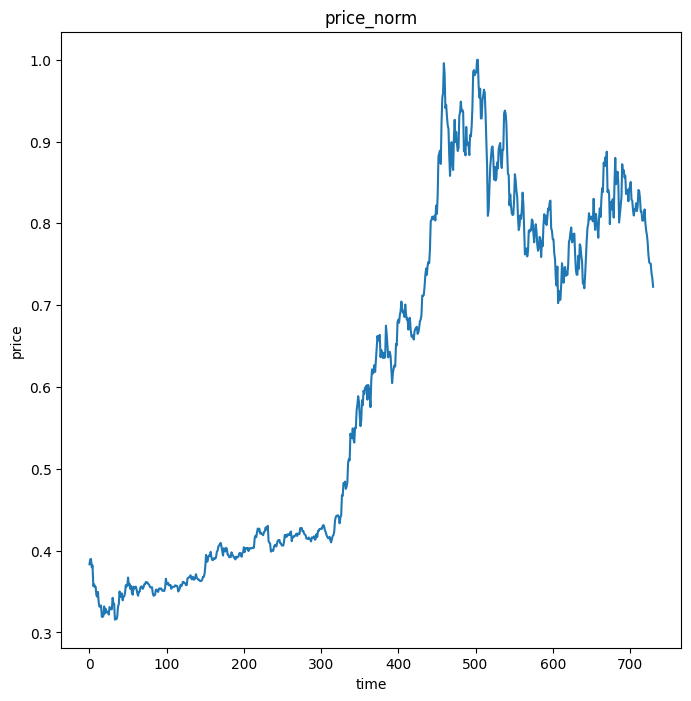

In [45]:
%matplotlib inline
from matplotlib import pyplot as pyplot
fig1 = plt.figure(figsize=(8,8))
plt.xlabel('time')
plt.ylabel('price')
plt.plot(price_norm)
plt.title('price_norm')
plt.show()

In [26]:
#处理rnn所需的三维格式，分别是样本数数量，时间步，特征数
def extract_data(data, time_step):
    X = []
    y = []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])

    X = np.array(X)
    y = np.array(y)

    # 重塑为RNN所需的三维格式
    X = X.reshape(X.shape[0], X.shape[1], 1)

    return X, y

In [27]:
time_step = 8

In [31]:
X,y = extract_data(price_norm, time_step)
print(X.shape)
print(y.shape)
print(X[0])


(723, 8, 1)
(723,)
[[0.38327341]
 [0.38926621]
 [0.38966573]
 [0.37954455]
 [0.3818085 ]
 [0.35637235]
 [0.35876948]
 [0.35583966]]


In [33]:
#after preprocess, setup Rnn model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=5, input_shape=(time_step, 1),activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
print(X.shape)
print(y.shape)

(723, 8, 1)
(723,)


In [36]:
model.fit(X, y, epochs=200, batch_size=30)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8872e-04
Epoch 156/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7833e-04
Epoch 157/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8694e-04
Epoch 158/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8188e-04
Epoch 159/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9902e-04
Epoch 160/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0257e-04
Epoch 161/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0129e-04
Epoch 162/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9481e-04
Epoch 163/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1149e-04
Epoch 164/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1171e-04
Epoch 165/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1578e-04
Epoch 166/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0476e-04
Epoch 167/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9078e-04
Epoch 168/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8231e-04
Epoch 

In [55]:
#make prediction
y_train_pred = model.predict(X)*max(price)
y_train = [i*max(price) for i in y]
print(y_train,y_train_pred)



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[np.float64(26.72), np.float64(25.93), np.float64(25.800000000000004), np.float64(26.24), np.float64(25.26), np.float64(24.88), np.float64(24.95), np.float64(24.99), np.float64(23.96), np.float64(23.95), np.float64(24.029999999999998), np.float64(24.909999999999997), np.float64(24.26), np.float64(24.7), np.float64(24.37), np.float64(24.44), np.float64(24.39), np.float64(24.16), np.float64(24.849999999999998), np.float64(24.77), np.float64(24.64), np.float64(24.65), np.float64(25.7), np.float64(25.230000000000004), np.float64(25.14), np.float64(23.69), np.float64(23.829999999999995), np.float64(23.74), np.float64(23.99), np.float64(24.909999999999997), np.float64(25.11), np.float64(26.28), np.float64(25.78), np.float64(26.03), np.float64(26.110000000000003), np.float64(25.47), np.float64(25.77), np.float64(25.84), np.float64(26.09), np.float64(26.86), np.float64(26.73), np.float64(26.85), np.float64(27.559999999999995), np.float64(26.83), np.float

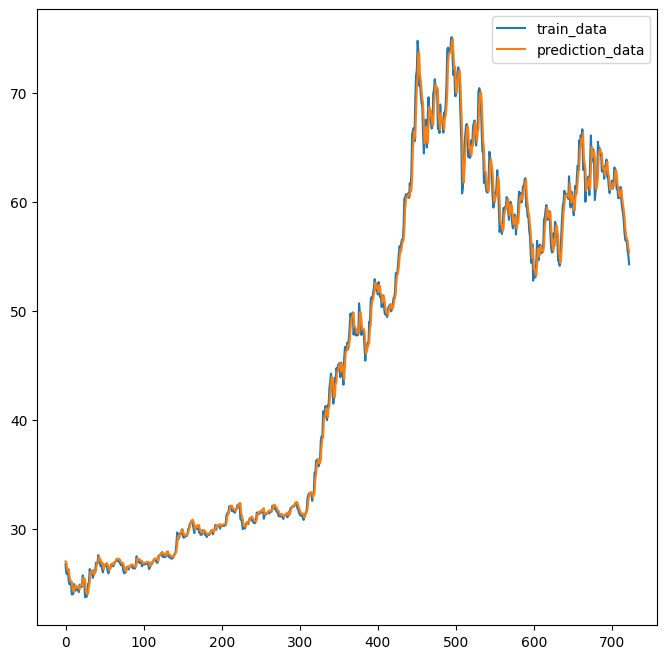

In [57]:
#visualize train data accurancy
fig2 = plt.figure(figsize=(8,8))
plt.plot(y_train, label='train_data')
plt.plot(y_train_pred, label='prediction_data')
plt.legend()
plt.show()

In [65]:
#use testset test
data_test = pd.read_csv('zgpa_test.csv')
price_test = data_test['close']
price_test_norm = price_test/max(price)
X_test, y_test = extract_data(price_test_norm, time_step)
print(X_test.shape)
print(y_test.shape)


(174, 8, 1)
(174,)


In [66]:
#predict test
y_test_pred = model.predict(X_test)*max(price)
y_test = [i*max(price) for i in y_test]
print(y_test,y_test_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[np.float64(55.27), np.float64(56.74), np.float64(56.89), np.float64(56.88), np.float64(58.07), np.float64(58.94), np.float64(58.22), np.float64(57.64), np.float64(58.58), np.float64(59.44), np.float64(59.67), np.float64(59.800000000000004), np.float64(59.4), np.float64(61.129999999999995), np.float64(61.36), np.float64(62.54), np.float64(62.42), np.float64(63.17), np.float64(63.25), np.float64(61.4), np.float64(63.44), np.float64(63.83), np.float64(64.03), np.float64(63.54), np.float64(65.17), np.float64(71.15), np.float64(68.16), np.float64(68.13), np.float64(68.16), np.float64(70.54), np.float64(70.73), np.float64(70.22), np.float64(70.31), np.float64(68.44), np.float64(66.85), np.float64(66.94), np.float64(67.4), np.float64(69.69), np.float64(70.95), np.float64(72.0), np.float64(73.15), np.float64(73.5), np.float64(74.7), np.float64(73.95), np.float64(72.87), np.float64(70.44), np.float64(70.84), np.float64(72.37), np.float64(71.55), np.float64

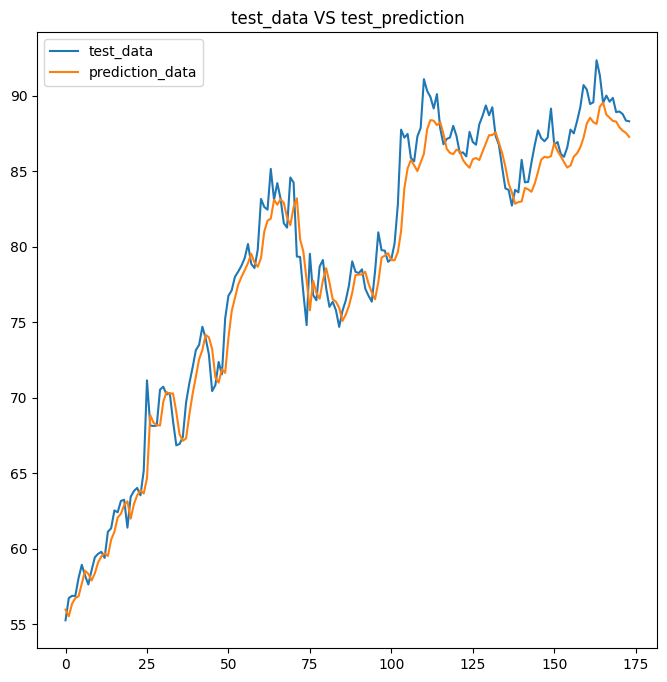

In [68]:
#visualize test data accurancy
fig4 = plt.figure(figsize=(8,8))
plt.plot(y_test, label='test_data')
plt.plot(y_test_pred, label='prediction_data')
plt.title('test_data VS test_prediction')
plt.legend()
plt.show()